## SKLearn
The following notes list utilities to generate indices that can be used to generate dataset splits according to different cross validation strategies.
### K-Fold
KFold divides all the samples in $k$ groups of samples, called folds (if $k=n$, this is equivalent to the Leave One Out strategy), of equal sizes (if possible). The prediction function is learned using $k-1$ folds, and the fold left out is used for test.



In [1]:
import sklearn
from sklearn.model_selection import KFold
X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


Each fold is constituted by two arrays: the first one is related to the training set, and the second one to the test set. Thus, one can create the training/test sets using numpy indexing:

In [0]:
import numpy as np
X = np.array([[0., 0.], [1., 1.], [-1., -1.], [2., 2.]])
y = np.array([0, 1, 0, 1])
X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]

### Repeated K-Fold
RepeatedKFold repeats K-Fold n times. It can be used when one requires to run KFold n times, producing different splits in each repetition.

Example of 2-fold K-Fold repeated 2 times:

In [3]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]


Similarly, RepeatedStratifiedKFold repeats Stratified K-Fold n times with different randomization in each repetition.

### Leave One Out (LOO)
LeaveOneOut (or LOO) is a simple cross-validation. Each learning set is created by taking all the samples except one, the test set being the sample left out. Thus, for $n$ samples, we have $n$ different training sets and $n$ different tests set. This cross-validation procedure does not waste much data as only one sample is removed from the training set:

In [0]:
from sklearn.model_selection import LeaveOneOut

X = [1, 2, 3, 4]
loo = LeaveOneOut()
for train, test in loo.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


Potential users of LOO for model selection should weigh a few known caveats. When compared with $k$-fold cross validation, one builds $n$ models from  samples instead of $k$ models, where $n>k$. Moreover, each is trained on $n-1$ samples rather than $(k-1)n/k$. In both ways, assuming $k$ is not too large and $k<n$, LOO is more computationally expensive than $k$-fold cross validation.

In terms of accuracy, LOO often results in high variance as an estimator for the test error. Intuitively, since $n-1$ of the $n$ samples are used to build each model, models constructed from folds are virtually identical to each other and to the model built from the entire training set.

However, if the learning curve is steep for the training size in question, then 5- or 10- fold cross validation can overestimate the generalization error.

As a general rule, most authors, and empirical evidence, suggest that 5- or 10- fold cross validation should be preferred to LOO.

### Leave P Out (LPO)
LeavePOut is very similar to LeaveOneOut as it creates all the possible training/test sets by removing $p$ samples from the complete set. For $n$ samples, this produces $n\choose p$ train-test pairs. Unlike LeaveOneOut and KFold, the test sets will overlap for $p>1$.
Example of Leave-2-Out on a dataset with 4 samples:

In [4]:
from sklearn.model_selection import LeavePOut

X = np.ones(4)
lpo = LeavePOut(p=2)
for train, test in lpo.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[1 3] [0 2]
[1 2] [0 3]
[0 3] [1 2]
[0 2] [1 3]
[0 1] [2 3]


###  Random permutations cross-validation a.k.a. Shuffle & Split
ShuffleSplit

The ShuffleSplit iterator will generate a user defined number of independent train / test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.

It is possible to control the randomness for reproducibility of the results by explicitly seeding the random_state pseudo random number generator.

Here is a usage example:

In [5]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25,
    random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))

[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


ShuffleSplit is thus a good alternative to KFold cross validation that allows a finer control on the number of iterations and the proportion of samples on each side of the train / test split.

### Cross-validation iterators with stratification based on class labels.
Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling as implemented in StratifiedKFold and StratifiedShuffleSplit to ensure that relative class frequencies is approximately preserved in each train and validation fold.
#### Stratified k-fold
StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

Example of stratified 3-fold cross-validation on a dataset with 10 samples from two slightly unbalanced classes:

In [6]:
from sklearn.model_selection import StratifiedKFold

X = np.ones(10)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("%s %s" % (train, test))

[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]


#### Stratified Shuffle Split
StratifiedShuffleSplit is a variation of ShuffleSplit, which returns stratified splits, i.e which creates splits by preserving the same percentage for each target class as in the complete set.

###  Cross-validation iterators for grouped data.
The i.i.d. assumption is broken if the underlying generative process yield groups of dependent samples.

Such a grouping of data is domain specific. An example would be when there is medical data collected from multiple patients, with multiple samples taken from each patient. And such data is likely to be dependent on the individual group. In our example, the patient id for each sample will be its group identifier.

In this case we would like to know if a model trained on a particular set of groups generalizes well to the unseen groups. To measure this, we need to ensure that all the samples in the validation fold come from groups that are not represented at all in the paired training fold.

The following cross-validation splitters can be used to do that. The grouping identifier for the samples is specified via the groups parameter.
#### GroupKFold
GroupKFold is a variation of [k-fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) which ensures that the same group is not represented in both testing and training sets. For example if the data is obtained from different subjects with several samples per-subject and if the model is flexible enough to learn from highly person specific features it could fail to generalize to new subjects. GroupKFold makes it possible to detect this kind of overfitting situations.

In [7]:
from sklearn.model_selection import GroupKFold
X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

gkf = GroupKFold(n_splits=3)
for train, test in gkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[0 1 2 3 4 5] [6 7 8 9]
[0 1 2 6 7 8 9] [3 4 5]
[3 4 5 6 7 8 9] [0 1 2]


Each subject is in a different testing fold, and the same subject is never in both testing and training. Notice that the folds do not have exactly the same size due to the imbalance in the data.

#### Leave One Group Out
LeaveOneGroupOut is a cross-validation scheme which holds out the samples according to a third-party provided array of integer groups. This group information can be used to encode arbitrary domain specific pre-defined cross-validation folds.

Each training set is thus constituted by all the samples except the ones related to a specific group.

For example, in the cases of multiple experiments, LeaveOneGroupOut can be used to create a cross-validation based on the different experiments: we create a training set using the samples of all the experiments except one:

In [8]:
from sklearn.model_selection import LeaveOneGroupOut

X = [1, 5, 10, 50, 60, 70, 80]
y = [0, 1, 1, 2, 2, 2, 2]
groups = [1, 1, 2, 2, 3, 3, 3]
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[2 3 4 5 6] [0 1]
[0 1 4 5 6] [2 3]
[0 1 2 3] [4 5 6]


Another common application is to use time information: for instance the groups could be the year of collection of the samples and thus allow for cross-validation against time-based splits.
#### Leave P Groups Out
LeavePGroupsOut is similar as LeaveOneGroupOut, but removes samples related to  groups for each training/test set.

Example of Leave-2-Group Out:

In [9]:
from sklearn.model_selection import LeavePGroupsOut

X = np.arange(6)
y = [1, 1, 1, 2, 2, 2]
groups = [1, 1, 2, 2, 3, 3]
lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[4 5] [0 1 2 3]
[2 3] [0 1 4 5]
[0 1] [2 3 4 5]


### GroupShuffleSplit
The GroupShuffleSplit iterator behaves as a combination of ShuffleSplit and LeavePGroupsOut, and generates a sequence of randomized partitions in which a subset of groups are held out for each split.

Here is a usage example:

In [10]:
from sklearn.model_selection import GroupShuffleSplit

X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 0.001]
y = ["a", "b", "b", "b", "c", "c", "c", "a"]
groups = [1, 1, 2, 2, 3, 3, 4, 4]
gss = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[0 1 2 3] [4 5 6 7]
[2 3 6 7] [0 1 4 5]
[2 3 4 5] [0 1 6 7]
[4 5 6 7] [0 1 2 3]


### Real world example:
**To check which model works best as a classifier best using K-Fold**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.686090 (0.064056)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


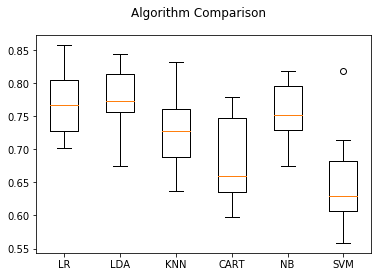

In [11]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

So we are getting best results from LinearDiscriminantAnalysis and LogisticRegression on the diabetes classification problem.

## Naive Bayes
Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable.

$$
P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                 {P(x_1, \dots, x_n)}
$$


<p>Using the naive conditional independence assumption that</p>
$$
P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$
for all $i$, this relationship is simplified to
$$
P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                 {P(x_1, \dots, x_n)}
$$
                                 
Since $P(x_1, \dots, x_n)$ is constant given the input,
we can use the following classification rule:

$$\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y),\end{aligned}\end{align}
$$
and we can use Maximum A Posteriori (MAP) estimation to estimate $P(y)$ and $P(x_i \mid y)$;
the former is then the relative frequency of class $(y)$
in the training set.

The different naive Bayes classifiers differ mainly by the assumptions they
make regarding the distribution of $P(x_i \mid y)$

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This in turn helps to alleviate problems stemming from the curse of dimensionality.

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.

### Naive Bayes on Pima Indians Diabetes Data

In [12]:
import pandas as pd
url = 'https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names, skiprows=9)

# notice that all features are continuous
print(pima.head())

# create X and y
X = pima.drop('label', axis=1)
y = pima.label

# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# import both Multinomial and Gaussian Naive Bayes
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import metrics

# testing accuracy of Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_class = mnb.predict(X_test)
print("testing accuracy of Multinomial Naive Bayes: ", metrics.accuracy_score(y_test, y_pred_class))


# testing accuracy of Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_class = gnb.predict(X_test)
print("testing accuracy of Gaussian Naive Bayes: ", metrics.accuracy_score(y_test, y_pred_class))


   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1
testing accuracy of Multinomial Naive Bayes:  0.5416666666666666
testing accuracy of Gaussian Naive Bayes:  0.7916666666666666


**Conclusion:** When applying Naive Bayes classification to a dataset with **continuous features**, it is better to use Gaussian Naive Bayes than Multinomial Naive Bayes. The latter is suitable for datasets containing **discrete features** (e.g., word counts).


## Nearest Neighbors
The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. 
he number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree).

Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits and satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.



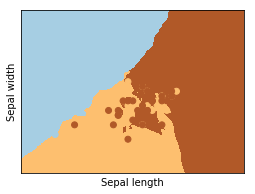

In [13]:
import numpy as np
import pylab as pl
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. 
Y = iris.target

h = .02 # step size in the mesh
knn=neighbors.KNeighborsClassifier()

# we create an instance of Neighbours Classifier and fit the data.
knn.fit(X, Y)

# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(4, 3))
pl.set_cmap(pl.cm.Paired)
pl.pcolormesh(xx, yy, Z)

# Plot also the training points
pl.scatter(X[:,0], X[:,1],c=Y )
pl.xlabel('Sepal length')
pl.ylabel('Sepal width')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()